# LR 시각화

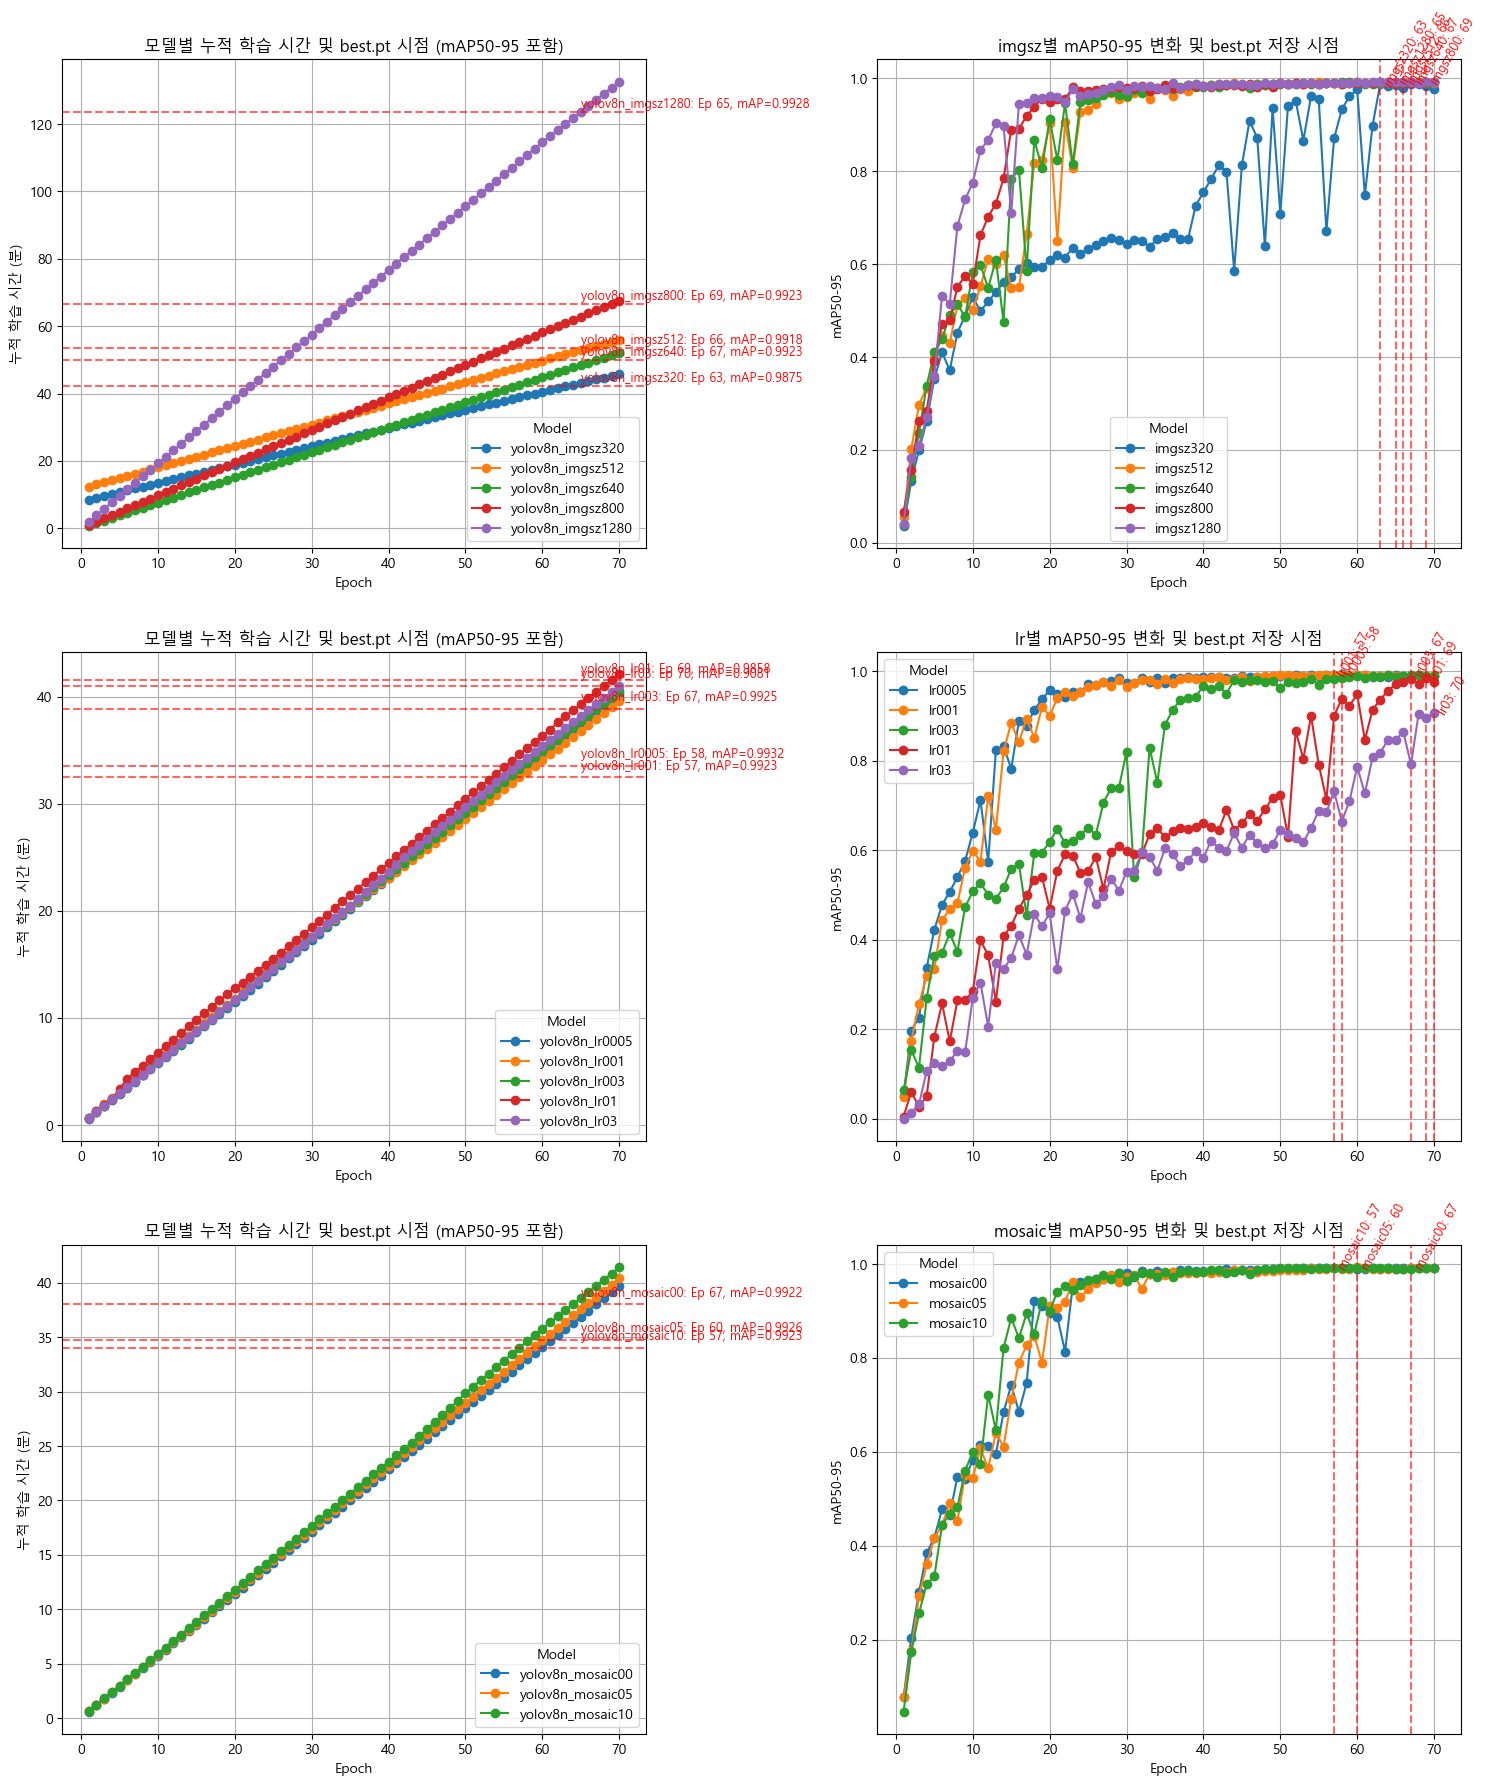

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')	

# -------------------------------------------------------
# 경로 및 실험 목록
# -------------------------------------------------------
base_dir = r"C:\Users\hyeon\Desktop\ai05-level1-project"
combined_dataset_dir = os.path.join(base_dir, "CombinedDataset")
yaml_path_combined = os.path.join(combined_dataset_dir, 'data_70_15_15_split.yaml')
exp_dir = os.path.join(base_dir, "Exp")
class_to_id_path = os.path.join(base_dir, "class_to_id.json")
lr_experiments = [
    "yolov8n_lr0005",
    "yolov8n_lr001",
    "yolov8n_lr003",
    "yolov8n_lr01",
    "yolov8n_lr03"
]
imgsz_experiments = [
    "yolov8n_imgsz320",
    "yolov8n_imgsz512",
    "yolov8n_imgsz640",
    "yolov8n_imgsz800",
    "yolov8n_imgsz1280"
]
mosaic_experiments = [
    "yolov8n_mosaic00",
    "yolov8n_mosaic05",
    "yolov8n_mosaic10"
]

# -------------------------------------------------------
# 그래프 생성
# -------------------------------------------------------
plt.figure(figsize=(15,18))
plt.subplot(3, 2, 1)

for name in imgsz_experiments:
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    results_path = os.path.join(exp_dir, name, "results.csv")

    if not os.path.exists(csv_path) or not os.path.exists(results_path):
        print(f"⚠️ {name}: 파일 누락 → 건너뜀")
        continue

    # 시간 데이터
    df_time = pd.read_csv(csv_path)
    df_time = df_time.dropna(subset=["epoch"])
    df_time["cumulative_sec"] = df_time["time_sec"].cumsum()
    df_time["cumulative_min"] = df_time["cumulative_sec"] / 60

    # 결과 데이터 (best.pt 시점)
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    best_score = round(df_res.loc[best_idx, map_col], 4)

    best_cumulative = df_time.loc[df_time["epoch"] == best_epoch, "cumulative_min"]
    if best_cumulative.empty:
        best_cumulative = df_time["cumulative_min"].iloc[-1]

    # 누적 시간 곡선
    plt.plot(df_time["epoch"], df_time["cumulative_min"], marker="o", label=name)

    # 가로 점선 + 점수 표시
    y_val = best_cumulative.values[0]
    plt.axhline(y_val, color="r", linestyle="--", alpha=0.6)
    plt.text(
        df_time["epoch"].max() - 5, y_val + 0.5,
        f"{name}: Ep {best_epoch}, mAP={best_score}",
        color="r", fontsize=9, va="bottom"
    )

plt.title("모델별 누적 학습 시간 및 best.pt 시점 (mAP50-95 포함)")
plt.xlabel("Epoch")
plt.ylabel("누적 학습 시간 (분)")
plt.grid(True)
plt.legend(title="Model")

plt.subplot(3, 2, 2)
for name in imgsz_experiments:
    csv_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue

    df = pd.read_csv(csv_path)

    # mAP50-95 컬럼 자동 탐색
    col = next((c for c in df.columns if "mAP50-95" in c), None)
    if col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # 곡선
    plt.plot(df["epoch"], df[col], marker='o', label=f"{name.split('_')[-1]}")

    # best.pt 저장 시점 찾기 (mAP50-95 최대값의 epoch)
    best_idx = df[col].idxmax()
    best_epoch = int(df.loc[best_idx, "epoch"])
    best_val = df.loc[best_idx, col]

    # 세로선 및 주석
    plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.6)
    plt.text(best_epoch + 0.3, best_val - 0.01,
             f"{name.split('_')[-1]}: {best_epoch}",
             rotation=60, color='r', fontsize=9, va='bottom')

plt.title("imgsz별 mAP50-95 변화 및 best.pt 저장 시점")
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.legend(title="Image Size")
plt.grid(True)
plt.legend(title="Model")


plt.subplot(3, 2, 3)

for name in lr_experiments:
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    results_path = os.path.join(exp_dir, name, "results.csv")

    if not os.path.exists(csv_path) or not os.path.exists(results_path):
        print(f"⚠️ {name}: 파일 누락 → 건너뜀")
        continue

    # 시간 데이터
    df_time = pd.read_csv(csv_path)
    df_time = df_time.dropna(subset=["epoch"])
    df_time["cumulative_sec"] = df_time["time_sec"].cumsum()
    df_time["cumulative_min"] = df_time["cumulative_sec"] / 60

    # 결과 데이터 (best.pt 시점)
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    best_score = round(df_res.loc[best_idx, map_col], 4)

    best_cumulative = df_time.loc[df_time["epoch"] == best_epoch, "cumulative_min"]
    if best_cumulative.empty:
        best_cumulative = df_time["cumulative_min"].iloc[-1]

    # 누적 시간 곡선
    plt.plot(df_time["epoch"], df_time["cumulative_min"], marker="o", label=name)

    # 가로 점선 + 점수 표시
    y_val = best_cumulative.values[0]
    plt.axhline(y_val, color="r", linestyle="--", alpha=0.6)
    plt.text(
        df_time["epoch"].max() - 5, y_val + 0.5,
        f"{name}: Ep {best_epoch}, mAP={best_score}",
        color="r", fontsize=9, va="bottom"
    )

plt.title("모델별 누적 학습 시간 및 best.pt 시점 (mAP50-95 포함)")
plt.xlabel("Epoch")
plt.ylabel("누적 학습 시간 (분)")
plt.grid(True)
plt.legend(title="Model")


plt.subplot(3, 2, 4)
for name in lr_experiments:
    csv_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue

    df = pd.read_csv(csv_path)

    # mAP50-95 컬럼 자동 탐색
    col = next((c for c in df.columns if "mAP50-95" in c), None)
    if col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # 곡선
    plt.plot(df["epoch"], df[col], marker='o', label=f"{name.split('_')[-1]}")

    # best.pt 저장 시점 찾기 (mAP50-95 최대값의 epoch)
    best_idx = df[col].idxmax()
    best_epoch = int(df.loc[best_idx, "epoch"])
    best_val = df.loc[best_idx, col]

    # 세로선 및 주석
    plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.6)
    plt.text(best_epoch + 0.3, best_val - 0.01,
             f"{name.split('_')[-1]}: {best_epoch}",
             rotation=60, color='r', fontsize=9, va='bottom')

plt.title("lr별 mAP50-95 변화 및 best.pt 저장 시점")
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.legend(title="Image Size")
plt.grid(True)
plt.legend(title="Model")

plt.subplot(3, 2, 5)

for name in mosaic_experiments:
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    results_path = os.path.join(exp_dir, name, "results.csv")

    if not os.path.exists(csv_path) or not os.path.exists(results_path):
        print(f"⚠️ {name}: 파일 누락 → 건너뜀")
        continue

    # 시간 데이터
    df_time = pd.read_csv(csv_path)
    df_time = df_time.dropna(subset=["epoch"])
    df_time["cumulative_sec"] = df_time["time_sec"].cumsum()
    df_time["cumulative_min"] = df_time["cumulative_sec"] / 60

    # 결과 데이터 (best.pt 시점)
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    best_score = round(df_res.loc[best_idx, map_col], 4)

    best_cumulative = df_time.loc[df_time["epoch"] == best_epoch, "cumulative_min"]
    if best_cumulative.empty:
        best_cumulative = df_time["cumulative_min"].iloc[-1]

    # 누적 시간 곡선
    plt.plot(df_time["epoch"], df_time["cumulative_min"], marker="o", label=name)

    # 가로 점선 + 점수 표시
    y_val = best_cumulative.values[0]
    plt.axhline(y_val, color="r", linestyle="--", alpha=0.6)
    plt.text(
        df_time["epoch"].max() - 5, y_val + 0.5,
        f"{name}: Ep {best_epoch}, mAP={best_score}",
        color="r", fontsize=9, va="bottom"
    )

plt.title("모델별 누적 학습 시간 및 best.pt 시점 (mAP50-95 포함)")
plt.xlabel("Epoch")
plt.ylabel("누적 학습 시간 (분)")
plt.grid(True)
plt.legend(title="Model")

plt.subplot(3, 2, 6)
for name in mosaic_experiments:
    csv_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue

    df = pd.read_csv(csv_path)

    # mAP50-95 컬럼 자동 탐색
    col = next((c for c in df.columns if "mAP50-95" in c), None)
    if col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # 곡선
    plt.plot(df["epoch"], df[col], marker='o', label=f"{name.split('_')[-1]}")

    # best.pt 저장 시점 찾기 (mAP50-95 최대값의 epoch)
    best_idx = df[col].idxmax()
    best_epoch = int(df.loc[best_idx, "epoch"])
    best_val = df.loc[best_idx, col]
    # 세로선 및 주석
    plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.6)
    plt.text(best_epoch + 0.3, best_val - 0.01,
             f"{name.split('_')[-1]}: {best_epoch}",
             rotation=60, color='r', fontsize=9, va='bottom')

plt.title("mosaic별 mAP50-95 변화 및 best.pt 저장 시점")
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.legend(title="Image Size")
plt.grid(True)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

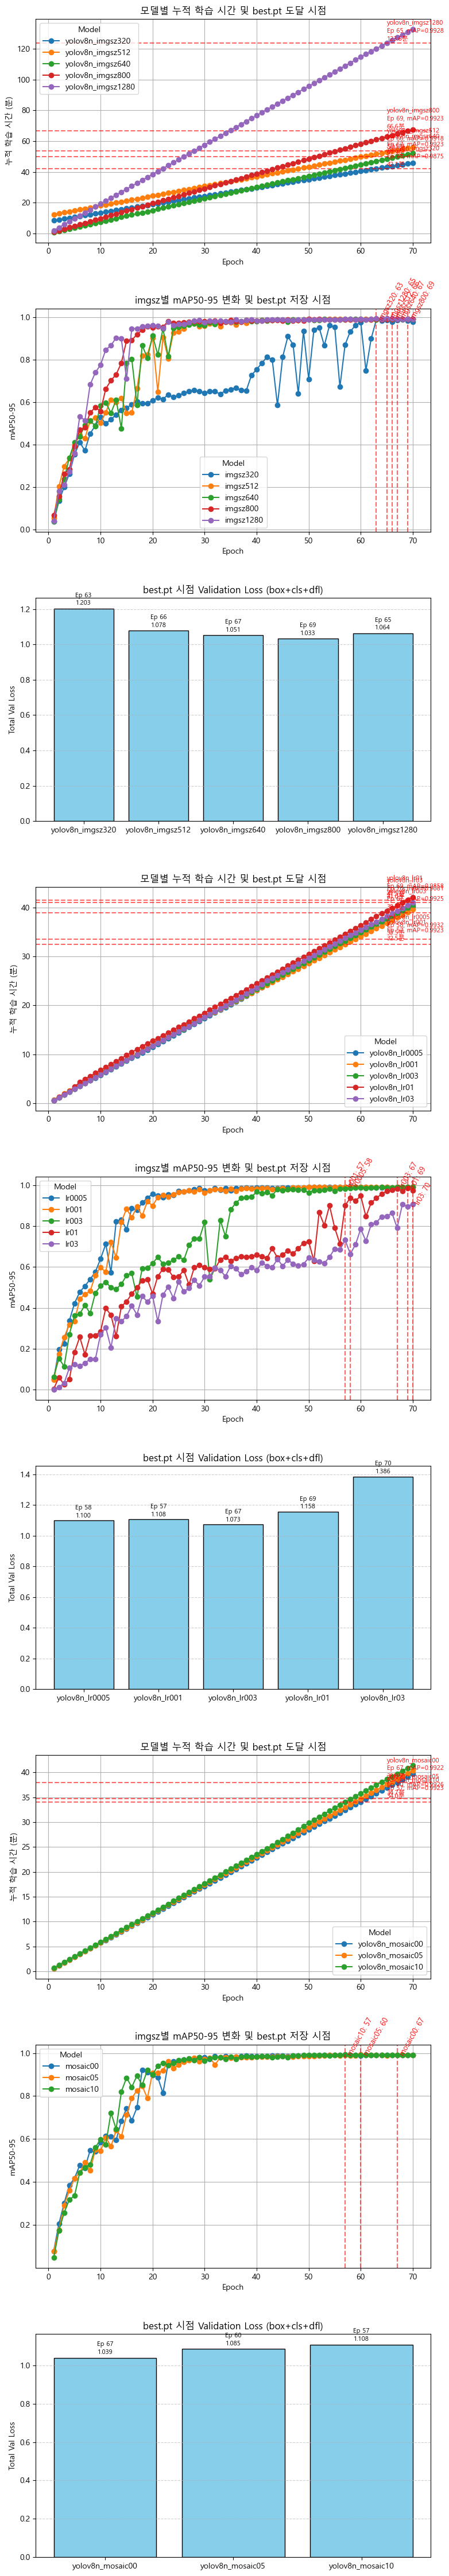

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')	

# -------------------------------------------------------
# 경로 및 실험 목록
# -------------------------------------------------------
base_dir = r"C:\Users\hyeon\Desktop\ai05-level1-project"
combined_dataset_dir = os.path.join(base_dir, "CombinedDataset")
yaml_path_combined = os.path.join(combined_dataset_dir, 'data_70_15_15_split.yaml')
exp_dir = os.path.join(base_dir, "Exp")
class_to_id_path = os.path.join(base_dir, "class_to_id.json")
lr_experiments = [
    "yolov8n_lr0005",
    "yolov8n_lr001",
    "yolov8n_lr003",
    "yolov8n_lr01",
    "yolov8n_lr03"
]
imgsz_experiments = [
    "yolov8n_imgsz320",
    "yolov8n_imgsz512",
    "yolov8n_imgsz640",
    "yolov8n_imgsz800",
    "yolov8n_imgsz1280"
]
mosaic_experiments = [
    "yolov8n_mosaic00",
    "yolov8n_mosaic05",
    "yolov8n_mosaic10"
]

# -------------------------------------------------------
# 그래프 생성
# -------------------------------------------------------
plt.figure(figsize=(8,45))
plt.subplot(9, 1, 1)

for name in imgsz_experiments:
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    results_path = os.path.join(exp_dir, name, "results.csv")

    if not os.path.exists(csv_path) or not os.path.exists(results_path):
        print(f"⚠️ {name}: 파일 누락 → 건너뜀")
        continue

    # ---------------------- 시간 데이터 ----------------------
    df_time = pd.read_csv(csv_path)
    df_time = df_time.dropna(subset=["epoch"])
    df_time["cumulative_sec"] = df_time["time_sec"].cumsum()
    df_time["cumulative_min"] = df_time["cumulative_sec"] / 60

    # ---------------------- 결과 데이터 ----------------------
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # best.pt 시점
    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    best_score = round(df_res.loc[best_idx, map_col], 4)

    # 해당 epoch까지 누적 시간
    best_cumulative = df_time.loc[df_time["epoch"] == best_epoch, "cumulative_min"]
    if best_cumulative.empty:
        best_cumulative = df_time["cumulative_min"].iloc[-1]
    y_val = best_cumulative.values[0]

    # ---------------------- 첫 번째 그래프 ----------------------
    plt.plot(df_time["epoch"], df_time["cumulative_min"], marker="o", label=name)
    plt.axhline(y_val, color="r", linestyle="--", alpha=0.6)
    plt.text(df_time["epoch"].max() - 5, y_val + 0.5,
             f"{name}\nEp {best_epoch}, mAP={best_score}\n{y_val:.1f}분",
             color="r", fontsize=8, va="bottom")

plt.title("모델별 누적 학습 시간 및 best.pt 도달 시점")
plt.xlabel("Epoch")
plt.ylabel("누적 학습 시간 (분)")
plt.grid(True)
plt.legend(title="Model")

# ============================================================
# 두 번째 subplot: best epoch에서의 Validation Loss 비교
# ============================================================
plt.subplot(9, 1, 2)
for name in imgsz_experiments:
    csv_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue

    df = pd.read_csv(csv_path)

    # mAP50-95 컬럼 자동 탐색
    col = next((c for c in df.columns if "mAP50-95" in c), None)
    if col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # 곡선
    plt.plot(df["epoch"], df[col], marker='o', label=f"{name.split('_')[-1]}")

    # best.pt 저장 시점 찾기 (mAP50-95 최대값의 epoch)
    best_idx = df[col].idxmax()
    best_epoch = int(df.loc[best_idx, "epoch"])
    best_val = df.loc[best_idx, col]

    # 세로선 및 주석
    plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.6)
    plt.text(best_epoch + 0.3, best_val - 0.01,
             f"{name.split('_')[-1]}: {best_epoch}",
             rotation=60, color='r', fontsize=9, va='bottom')

plt.title("imgsz별 mAP50-95 변화 및 best.pt 저장 시점")
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.legend(title="Image Size")
plt.grid(True)
plt.legend(title="Model")


plt.subplot(9, 1, 3)

loss_summary = []  # 그래프용 저장

for name in imgsz_experiments:
    results_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(results_path):
        continue
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        continue

    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    val_box = df_res.loc[best_idx, "val/box_loss"]
    val_cls = df_res.loc[best_idx, "val/cls_loss"]
    val_dfl = df_res.loc[best_idx, "val/dfl_loss"]
    total_loss = val_box + val_cls + val_dfl
    loss_summary.append((name, best_epoch, total_loss))

# 막대 그래프
if loss_summary:
    names = [n for n, _, _ in loss_summary]
    epochs = [e for _, e, _ in loss_summary]
    losses = [l for _, _, l in loss_summary]
    plt.bar(names, losses, color="skyblue", edgecolor="black")
    for i, (n, e, l) in enumerate(loss_summary):
        plt.text(i, l + 0.02, f"Ep {e}\n{l:.3f}", ha="center", fontsize=8)
else:
    print("⚠️ best epoch에서의 Loss 정보를 찾지 못함")

plt.title("best.pt 시점 Validation Loss (box+cls+dfl)")
plt.ylabel("Total Val Loss")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.subplot(9, 1, 4)

for name in lr_experiments:
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    results_path = os.path.join(exp_dir, name, "results.csv")

    if not os.path.exists(csv_path) or not os.path.exists(results_path):
        print(f"⚠️ {name}: 파일 누락 → 건너뜀")
        continue

    # ---------------------- 시간 데이터 ----------------------
    df_time = pd.read_csv(csv_path)
    df_time = df_time.dropna(subset=["epoch"])
    df_time["cumulative_sec"] = df_time["time_sec"].cumsum()
    df_time["cumulative_min"] = df_time["cumulative_sec"] / 60

    # ---------------------- 결과 데이터 ----------------------
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # best.pt 시점
    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    best_score = round(df_res.loc[best_idx, map_col], 4)

    # 해당 epoch까지 누적 시간
    best_cumulative = df_time.loc[df_time["epoch"] == best_epoch, "cumulative_min"]
    if best_cumulative.empty:
        best_cumulative = df_time["cumulative_min"].iloc[-1]
    y_val = best_cumulative.values[0]

    # ---------------------- 첫 번째 그래프 ----------------------
    plt.plot(df_time["epoch"], df_time["cumulative_min"], marker="o", label=name)
    plt.axhline(y_val, color="r", linestyle="--", alpha=0.6)
    plt.text(df_time["epoch"].max() - 5, y_val + 0.5,
             f"{name}\nEp {best_epoch}, mAP={best_score}\n{y_val:.1f}분",
             color="r", fontsize=8, va="bottom")

plt.title("모델별 누적 학습 시간 및 best.pt 도달 시점")
plt.xlabel("Epoch")
plt.ylabel("누적 학습 시간 (분)")
plt.grid(True)
plt.legend(title="Model")

# ============================================================
# 두 번째 subplot: best epoch에서의 Validation Loss 비교
# ============================================================
plt.subplot(9, 1, 5)
for name in lr_experiments:
    csv_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue

    df = pd.read_csv(csv_path)

    # mAP50-95 컬럼 자동 탐색
    col = next((c for c in df.columns if "mAP50-95" in c), None)
    if col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # 곡선
    plt.plot(df["epoch"], df[col], marker='o', label=f"{name.split('_')[-1]}")

    # best.pt 저장 시점 찾기 (mAP50-95 최대값의 epoch)
    best_idx = df[col].idxmax()
    best_epoch = int(df.loc[best_idx, "epoch"])
    best_val = df.loc[best_idx, col]

    # 세로선 및 주석
    plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.6)
    plt.text(best_epoch + 0.3, best_val - 0.01,
             f"{name.split('_')[-1]}: {best_epoch}",
             rotation=60, color='r', fontsize=9, va='bottom')

plt.title("imgsz별 mAP50-95 변화 및 best.pt 저장 시점")
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.legend(title="Image Size")
plt.grid(True)
plt.legend(title="Model")


plt.subplot(9, 1, 6)

loss_summary = []  # 그래프용 저장

for name in lr_experiments:
    results_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(results_path):
        continue
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        continue

    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    val_box = df_res.loc[best_idx, "val/box_loss"]
    val_cls = df_res.loc[best_idx, "val/cls_loss"]
    val_dfl = df_res.loc[best_idx, "val/dfl_loss"]
    total_loss = val_box + val_cls + val_dfl
    loss_summary.append((name, best_epoch, total_loss))

# 막대 그래프
if loss_summary:
    names = [n for n, _, _ in loss_summary]
    epochs = [e for _, e, _ in loss_summary]
    losses = [l for _, _, l in loss_summary]
    plt.bar(names, losses, color="skyblue", edgecolor="black")
    for i, (n, e, l) in enumerate(loss_summary):
        plt.text(i, l + 0.02, f"Ep {e}\n{l:.3f}", ha="center", fontsize=8)
else:
    print("⚠️ best epoch에서의 Loss 정보를 찾지 못함")

plt.title("best.pt 시점 Validation Loss (box+cls+dfl)")
plt.ylabel("Total Val Loss")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.subplot(9, 1, 7)

for name in mosaic_experiments:
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    results_path = os.path.join(exp_dir, name, "results.csv")

    if not os.path.exists(csv_path) or not os.path.exists(results_path):
        print(f"⚠️ {name}: 파일 누락 → 건너뜀")
        continue

    # ---------------------- 시간 데이터 ----------------------
    df_time = pd.read_csv(csv_path)
    df_time = df_time.dropna(subset=["epoch"])
    df_time["cumulative_sec"] = df_time["time_sec"].cumsum()
    df_time["cumulative_min"] = df_time["cumulative_sec"] / 60

    # ---------------------- 결과 데이터 ----------------------
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # best.pt 시점
    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    best_score = round(df_res.loc[best_idx, map_col], 4)

    # 해당 epoch까지 누적 시간
    best_cumulative = df_time.loc[df_time["epoch"] == best_epoch, "cumulative_min"]
    if best_cumulative.empty:
        best_cumulative = df_time["cumulative_min"].iloc[-1]
    y_val = best_cumulative.values[0]

    # ---------------------- 첫 번째 그래프 ----------------------
    plt.plot(df_time["epoch"], df_time["cumulative_min"], marker="o", label=name)
    plt.axhline(y_val, color="r", linestyle="--", alpha=0.6)
    plt.text(df_time["epoch"].max() - 5, y_val + 0.5,
             f"{name}\nEp {best_epoch}, mAP={best_score}\n{y_val:.1f}분",
             color="r", fontsize=8, va="bottom")

plt.title("모델별 누적 학습 시간 및 best.pt 도달 시점")
plt.xlabel("Epoch")
plt.ylabel("누적 학습 시간 (분)")
plt.grid(True)
plt.legend(title="Model")

# ============================================================
# 두 번째 subplot: best epoch에서의 Validation Loss 비교
# ============================================================
plt.subplot(9, 1, 8)
for name in mosaic_experiments:
    csv_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue

    df = pd.read_csv(csv_path)

    # mAP50-95 컬럼 자동 탐색
    col = next((c for c in df.columns if "mAP50-95" in c), None)
    if col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # 곡선
    plt.plot(df["epoch"], df[col], marker='o', label=f"{name.split('_')[-1]}")

    # best.pt 저장 시점 찾기 (mAP50-95 최대값의 epoch)
    best_idx = df[col].idxmax()
    best_epoch = int(df.loc[best_idx, "epoch"])
    best_val = df.loc[best_idx, col]

    # 세로선 및 주석
    plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.6)
    plt.text(best_epoch + 0.3, best_val - 0.01,
             f"{name.split('_')[-1]}: {best_epoch}",
             rotation=60, color='r', fontsize=9, va='bottom')

plt.title("imgsz별 mAP50-95 변화 및 best.pt 저장 시점")
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.legend(title="Image Size")
plt.grid(True)
plt.legend(title="Model")


plt.subplot(9, 1, 9)

loss_summary = []  # 그래프용 저장

for name in mosaic_experiments:
    results_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(results_path):
        continue
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        continue

    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    val_box = df_res.loc[best_idx, "val/box_loss"]
    val_cls = df_res.loc[best_idx, "val/cls_loss"]
    val_dfl = df_res.loc[best_idx, "val/dfl_loss"]
    total_loss = val_box + val_cls + val_dfl
    loss_summary.append((name, best_epoch, total_loss))

# 막대 그래프
if loss_summary:
    names = [n for n, _, _ in loss_summary]
    epochs = [e for _, e, _ in loss_summary]
    losses = [l for _, _, l in loss_summary]
    plt.bar(names, losses, color="skyblue", edgecolor="black")
    for i, (n, e, l) in enumerate(loss_summary):
        plt.text(i, l + 0.02, f"Ep {e}\n{l:.3f}", ha="center", fontsize=8)
else:
    print("⚠️ best epoch에서의 Loss 정보를 찾지 못함")

plt.title("best.pt 시점 Validation Loss (box+cls+dfl)")
plt.ylabel("Total Val Loss")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [17]:
import os
import pandas as pd

exp_dir = os.path.join(base_dir, "Exp")
experiments = [
    "yolov8n_lr001",
    "yolov8n_lr003",
    "yolov8n_lr01",
    "yolov8n_lr03"
]

summary = []

for name in imgsz_experiments:
    result_path = os.path.join(exp_dir, name, "results.csv")
    time_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")

    if not os.path.exists(result_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue
    if not os.path.exists(time_path):
        print(f"⚠️ {name}_epoch_times.csv 없음 → 총 시간 계산 불가")
        total_time = None
    else:
        time_df = pd.read_csv(time_path)
        total_time = round(time_df["time_sec"].sum(), 2)

    df = pd.read_csv(result_path)

    # mAP50-95 컬럼명 탐색
    map_col = next((c for c in df.columns if "mAP50-95" in c or "metrics/mAP50-95(B)" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾을 수 없음.")
        continue

    best_epoch = int(df.loc[df[map_col].idxmax(), "epoch"])
    best_map = round(df[map_col].max(), 4)

    val_box = round(df.loc[df[map_col].idxmax(), "val/box_loss"], 4)
    val_cls = round(df.loc[df[map_col].idxmax(), "val/cls_loss"], 4)
    val_dfl = round(df.loc[df[map_col].idxmax(), "val/dfl_loss"], 4)
    train_box = round(df.loc[df[map_col].idxmax(), "train/box_loss"], 4)

    summary.append({
        "Model": name,
        "Best Epoch": best_epoch,
        "mAP50-95": best_map,
        "Val Box Loss": val_box,
        "Val Cls Loss": val_cls,
        "Val DFL Loss": val_dfl,
        "Train Box Loss": train_box,
        "Total Time (s)": total_time
    })

# 결과 출력
df_summary = pd.DataFrame(summary)
pd.set_option('display.precision', 4)
print("\n===== 각 모델별 요약 =====")
print(df_summary)

# CSV로 저장
csv_out = os.path.join(exp_dir, "model_summary.csv")
df_summary.to_csv



===== 각 모델별 요약 =====
               Model  Best Epoch  mAP50-95  Val Box Loss  Val Cls Loss  \
0   yolov8n_imgsz320          63    0.9875        0.1716        0.2701   
1   yolov8n_imgsz512          66    0.9918        0.1588        0.1539   
2   yolov8n_imgsz640          67    0.9923        0.1479        0.1440   
3   yolov8n_imgsz800          69    0.9923        0.1416        0.1244   
4  yolov8n_imgsz1280          65    0.9928        0.1517        0.1307   

   Val DFL Loss  Train Box Loss  Total Time (s)  
0        0.7616          0.2026         2747.77  
1        0.7654          0.1732         3359.15  
2        0.7596          0.1648         3124.66  
3        0.7672          0.1501         4052.03  
4        0.7813          0.1581         7956.81  


<bound method NDFrame.to_csv of                Model  Best Epoch  mAP50-95  Val Box Loss  Val Cls Loss  \
0   yolov8n_imgsz320          63    0.9875        0.1716        0.2701   
1   yolov8n_imgsz512          66    0.9918        0.1588        0.1539   
2   yolov8n_imgsz640          67    0.9923        0.1479        0.1440   
3   yolov8n_imgsz800          69    0.9923        0.1416        0.1244   
4  yolov8n_imgsz1280          65    0.9928        0.1517        0.1307   

   Val DFL Loss  Train Box Loss  Total Time (s)  
0        0.7616          0.2026         2747.77  
1        0.7654          0.1732         3359.15  
2        0.7596          0.1648         3124.66  
3        0.7672          0.1501         4052.03  
4        0.7813          0.1581         7956.81  >

In [18]:
summary = []

for name in lr_experiments:
    result_path = os.path.join(exp_dir, name, "results.csv")
    time_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")

    if not os.path.exists(result_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue
    if not os.path.exists(time_path):
        print(f"⚠️ {name}_epoch_times.csv 없음 → 총 시간 계산 불가")
        total_time = None
    else:
        time_df = pd.read_csv(time_path)
        total_time = round(time_df["time_sec"].sum(), 2)

    df = pd.read_csv(result_path)

    # mAP50-95 컬럼명 탐색
    map_col = next((c for c in df.columns if "mAP50-95" in c or "metrics/mAP50-95(B)" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾을 수 없음.")
        continue

    best_epoch = int(df.loc[df[map_col].idxmax(), "epoch"])
    best_map = round(df[map_col].max(), 4)

    val_box = round(df.loc[df[map_col].idxmax(), "val/box_loss"], 4)
    val_cls = round(df.loc[df[map_col].idxmax(), "val/cls_loss"], 4)
    val_dfl = round(df.loc[df[map_col].idxmax(), "val/dfl_loss"], 4)
    train_box = round(df.loc[df[map_col].idxmax(), "train/box_loss"], 4)

    summary.append({
        "Model": name,
        "Best Epoch": best_epoch,
        "mAP50-95": best_map,
        "Val Box Loss": val_box,
        "Val Cls Loss": val_cls,
        "Val DFL Loss": val_dfl,
        "Train Box Loss": train_box,
        "Total Time (s)": total_time
    })

# 결과 출력
df_summary = pd.DataFrame(summary)
pd.set_option('display.precision', 4)
print("\n===== 각 모델별 요약 =====")
print(df_summary)

# CSV로 저장
csv_out = os.path.join(exp_dir, "model_summary.csv")
df_summary.to_csv


===== 각 모델별 요약 =====
            Model  Best Epoch  mAP50-95  Val Box Loss  Val Cls Loss  \
0  yolov8n_lr0005          58    0.9932        0.1602        0.1737   
1   yolov8n_lr001          57    0.9923        0.1634        0.1737   
2   yolov8n_lr003          67    0.9925        0.1594        0.1507   
3    yolov8n_lr01          69    0.9858        0.1624        0.2312   
4    yolov8n_lr03          70    0.9081        0.1704        0.4432   

   Val DFL Loss  Train Box Loss  Total Time (s)  
0        0.7661          0.2267         2413.73  
1        0.7712          0.2440         2374.96  
2        0.7629          0.1757         2431.14  
3        0.7643          0.1797         2523.35  
4        0.7729          0.1969         2458.99  


<bound method NDFrame.to_csv of             Model  Best Epoch  mAP50-95  Val Box Loss  Val Cls Loss  \
0  yolov8n_lr0005          58    0.9932        0.1602        0.1737   
1   yolov8n_lr001          57    0.9923        0.1634        0.1737   
2   yolov8n_lr003          67    0.9925        0.1594        0.1507   
3    yolov8n_lr01          69    0.9858        0.1624        0.2312   
4    yolov8n_lr03          70    0.9081        0.1704        0.4432   

   Val DFL Loss  Train Box Loss  Total Time (s)  
0        0.7661          0.2267         2413.73  
1        0.7712          0.2440         2374.96  
2        0.7629          0.1757         2431.14  
3        0.7643          0.1797         2523.35  
4        0.7729          0.1969         2458.99  >

In [19]:
summary = []

for name in mosaic_experiments:
    result_path = os.path.join(exp_dir, name, "results.csv")
    time_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")

    if not os.path.exists(result_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue
    if not os.path.exists(time_path):
        print(f"⚠️ {name}_epoch_times.csv 없음 → 총 시간 계산 불가")
        total_time = None
    else:
        time_df = pd.read_csv(time_path)
        total_time = round(time_df["time_sec"].sum(), 2)

    df = pd.read_csv(result_path)

    # mAP50-95 컬럼명 탐색
    map_col = next((c for c in df.columns if "mAP50-95" in c or "metrics/mAP50-95(B)" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾을 수 없음.")
        continue

    best_epoch = int(df.loc[df[map_col].idxmax(), "epoch"])
    best_map = round(df[map_col].max(), 4)

    val_box = round(df.loc[df[map_col].idxmax(), "val/box_loss"], 4)
    val_cls = round(df.loc[df[map_col].idxmax(), "val/cls_loss"], 4)
    val_dfl = round(df.loc[df[map_col].idxmax(), "val/dfl_loss"], 4)
    train_box = round(df.loc[df[map_col].idxmax(), "train/box_loss"], 4)

    summary.append({
        "Model": name,
        "Best Epoch": best_epoch,
        "mAP50-95": best_map,
        "Val Box Loss": val_box,
        "Val Cls Loss": val_cls,
        "Val DFL Loss": val_dfl,
        "Train Box Loss": train_box,
        "Total Time (s)": total_time
    })

# 결과 출력
df_summary = pd.DataFrame(summary)
pd.set_option('display.precision', 4)
print("\n===== 각 모델별 요약 =====")
print(df_summary)

# CSV로 저장
csv_out = os.path.join(exp_dir, "model_summary.csv")
df_summary.to_csv


===== 각 모델별 요약 =====
              Model  Best Epoch  mAP50-95  Val Box Loss  Val Cls Loss  \
0  yolov8n_mosaic00          67    0.9922        0.1411        0.1349   
1  yolov8n_mosaic05          60    0.9926        0.1592        0.1566   
2  yolov8n_mosaic10          57    0.9923        0.1634        0.1737   

   Val DFL Loss  Train Box Loss  Total Time (s)  
0        0.7628          0.1498         2381.70  
1        0.7694          0.2168         2423.21  
2        0.7712          0.2440         2483.95  


<bound method NDFrame.to_csv of               Model  Best Epoch  mAP50-95  Val Box Loss  Val Cls Loss  \
0  yolov8n_mosaic00          67    0.9922        0.1411        0.1349   
1  yolov8n_mosaic05          60    0.9926        0.1592        0.1566   
2  yolov8n_mosaic10          57    0.9923        0.1634        0.1737   

   Val DFL Loss  Train Box Loss  Total Time (s)  
0        0.7628          0.1498         2381.70  
1        0.7694          0.2168         2423.21  
2        0.7712          0.2440         2483.95  >

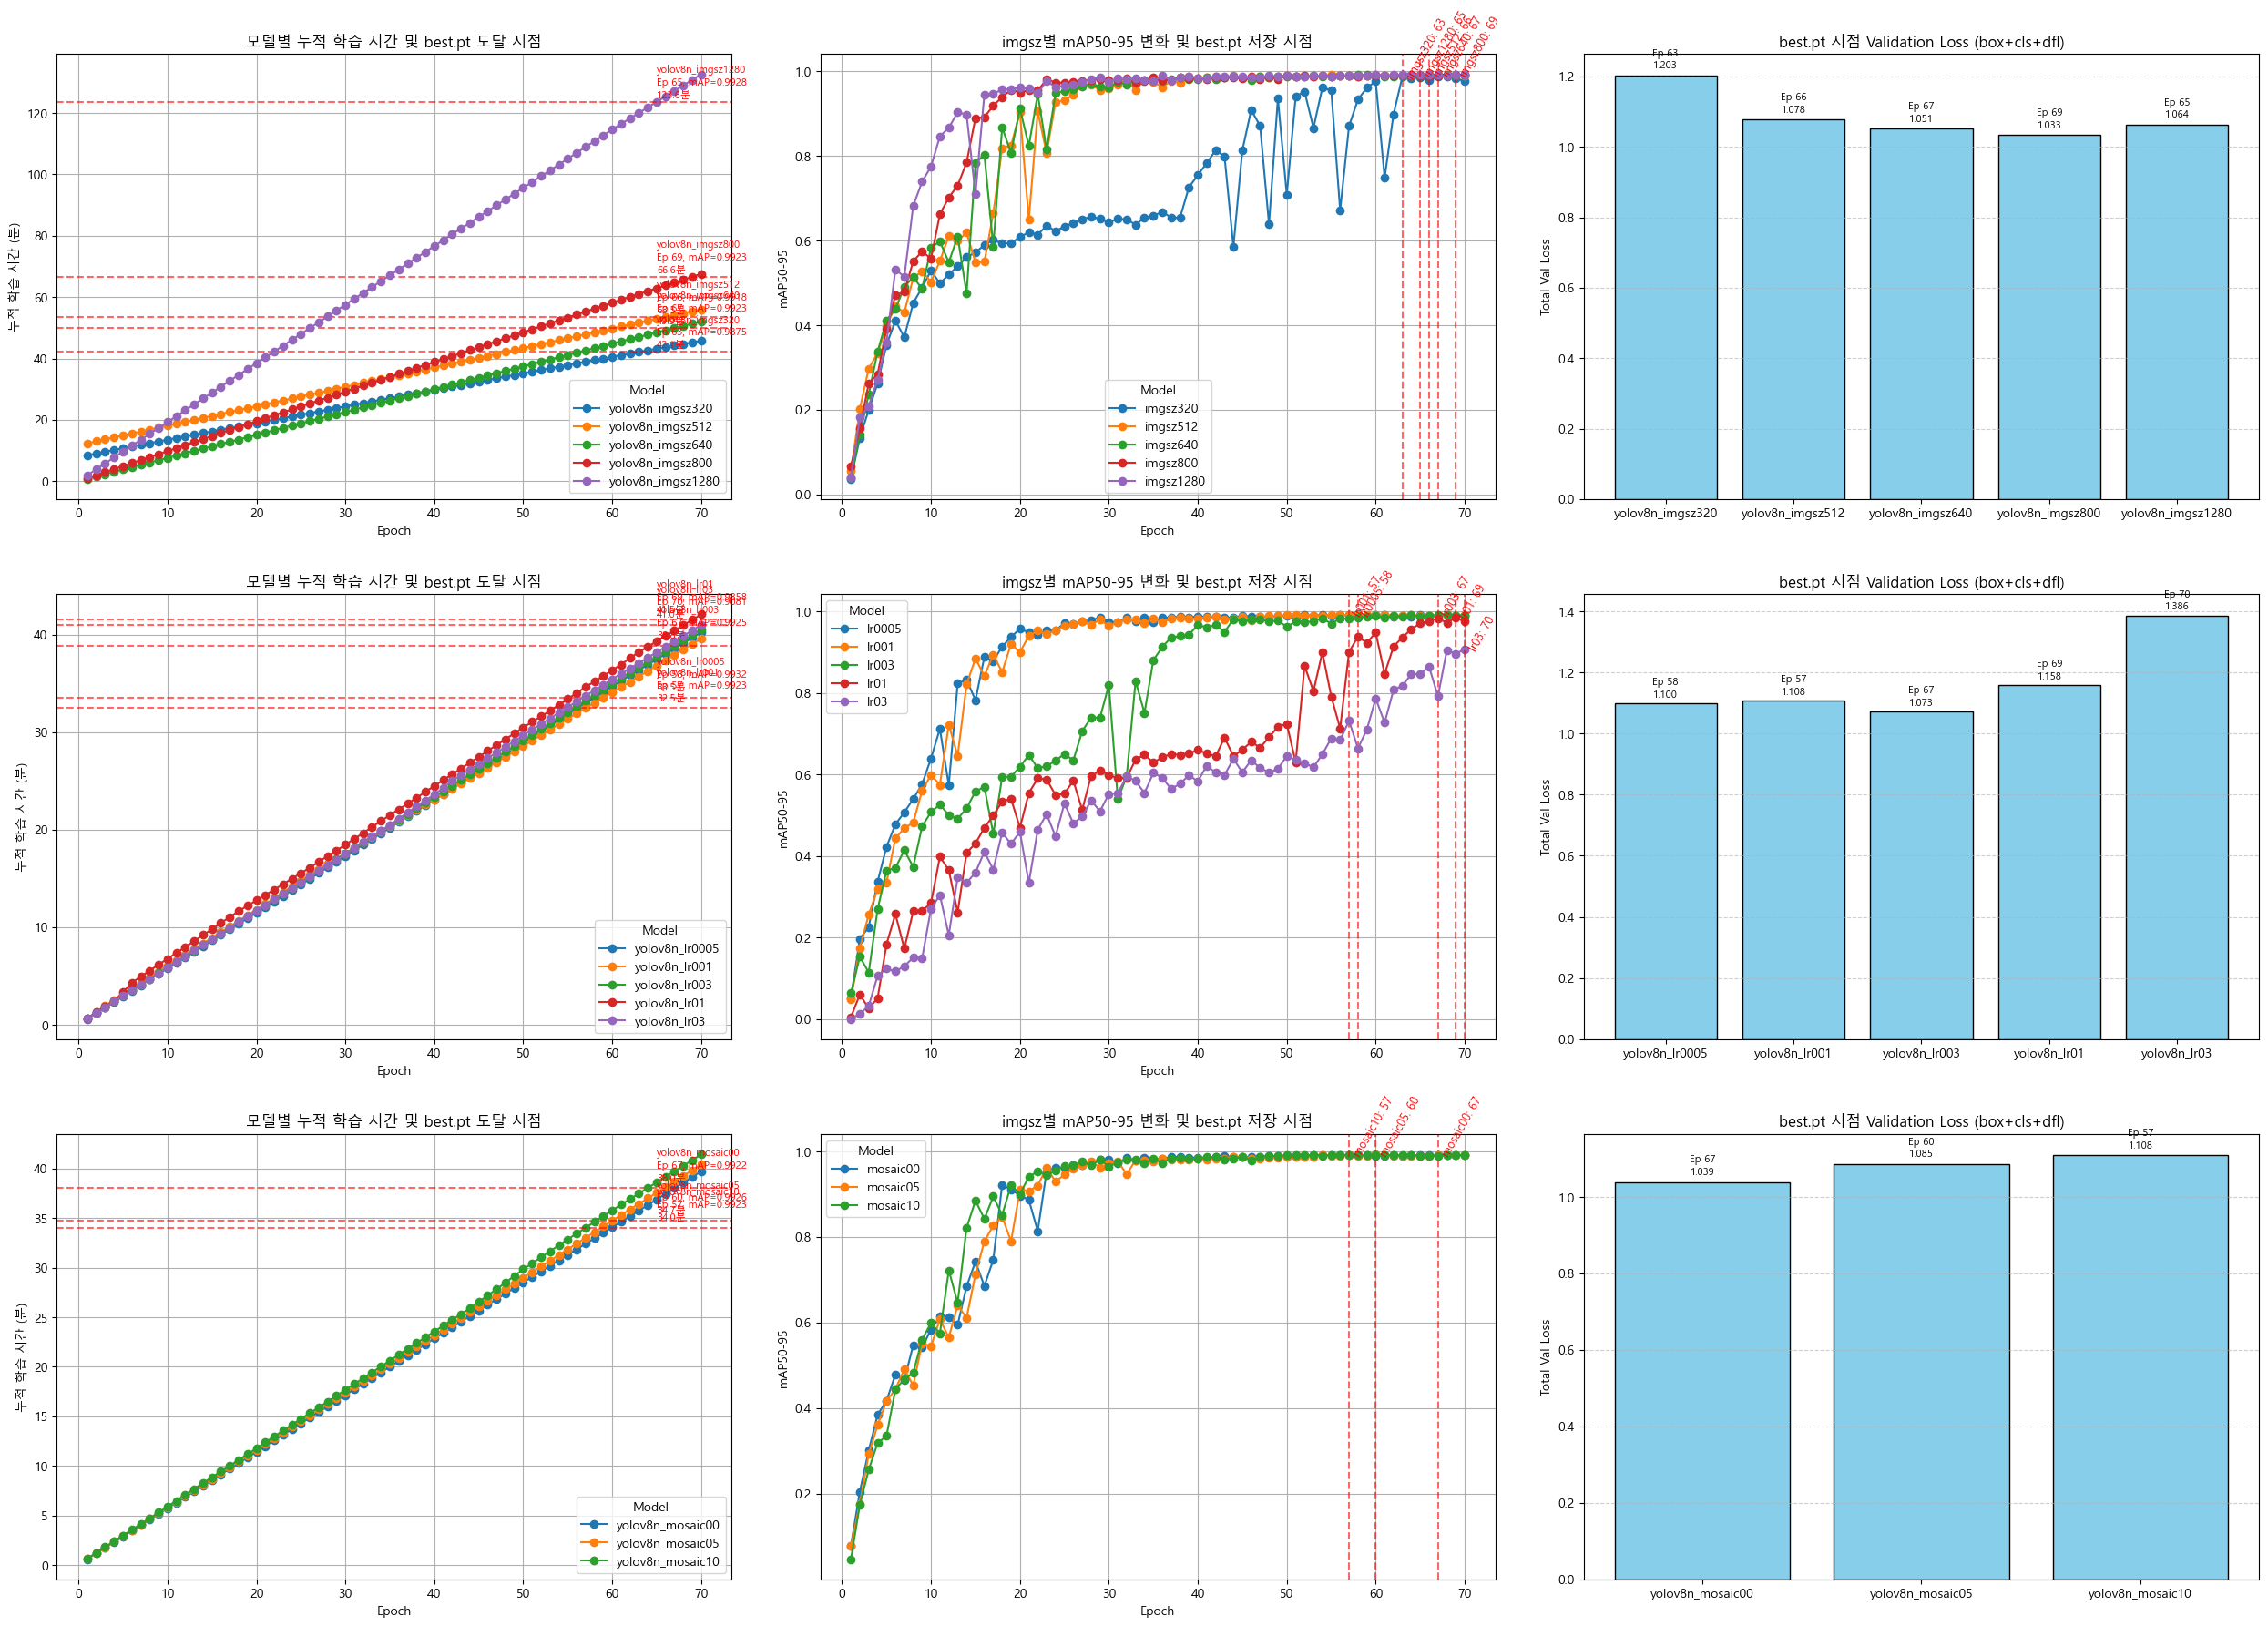

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')	

# -------------------------------------------------------
# 경로 및 실험 목록
# -------------------------------------------------------
base_dir = r"C:\Users\hyeon\Desktop\ai05-level1-project"
combined_dataset_dir = os.path.join(base_dir, "CombinedDataset")
yaml_path_combined = os.path.join(combined_dataset_dir, 'data_70_15_15_split.yaml')
exp_dir = os.path.join(base_dir, "Exp")
class_to_id_path = os.path.join(base_dir, "class_to_id.json")
lr_experiments = [
    "yolov8n_lr0005",
    "yolov8n_lr001",
    "yolov8n_lr003",
    "yolov8n_lr01",
    "yolov8n_lr03"
]
imgsz_experiments = [
    "yolov8n_imgsz320",
    "yolov8n_imgsz512",
    "yolov8n_imgsz640",
    "yolov8n_imgsz800",
    "yolov8n_imgsz1280"
]
mosaic_experiments = [
    "yolov8n_mosaic00",
    "yolov8n_mosaic05",
    "yolov8n_mosaic10"
]

# -------------------------------------------------------
# 그래프 생성
# -------------------------------------------------------
plt.figure(figsize=(25, 18))
plt.subplot(3, 3, 1)

for name in imgsz_experiments:
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    results_path = os.path.join(exp_dir, name, "results.csv")

    if not os.path.exists(csv_path) or not os.path.exists(results_path):
        print(f"⚠️ {name}: 파일 누락 → 건너뜀")
        continue

    # ---------------------- 시간 데이터 ----------------------
    df_time = pd.read_csv(csv_path)
    df_time = df_time.dropna(subset=["epoch"])
    df_time["cumulative_sec"] = df_time["time_sec"].cumsum()
    df_time["cumulative_min"] = df_time["cumulative_sec"] / 60

    # ---------------------- 결과 데이터 ----------------------
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # best.pt 시점
    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    best_score = round(df_res.loc[best_idx, map_col], 4)

    # 해당 epoch까지 누적 시간
    best_cumulative = df_time.loc[df_time["epoch"] == best_epoch, "cumulative_min"]
    if best_cumulative.empty:
        best_cumulative = df_time["cumulative_min"].iloc[-1]
    y_val = best_cumulative.values[0]

    # ---------------------- 첫 번째 그래프 ----------------------
    plt.plot(df_time["epoch"], df_time["cumulative_min"], marker="o", label=name)
    plt.axhline(y_val, color="r", linestyle="--", alpha=0.6)
    plt.text(df_time["epoch"].max() - 5, y_val + 0.5,
             f"{name}\nEp {best_epoch}, mAP={best_score}\n{y_val:.1f}분",
             color="r", fontsize=8, va="bottom")

plt.title("모델별 누적 학습 시간 및 best.pt 도달 시점")
plt.xlabel("Epoch")
plt.ylabel("누적 학습 시간 (분)")
plt.grid(True)
plt.legend(title="Model")

# ============================================================
# 두 번째 subplot: best epoch에서의 Validation Loss 비교
# ============================================================
plt.subplot(3, 3, 2)
for name in imgsz_experiments:
    csv_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue

    df = pd.read_csv(csv_path)

    # mAP50-95 컬럼 자동 탐색
    col = next((c for c in df.columns if "mAP50-95" in c), None)
    if col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # 곡선
    plt.plot(df["epoch"], df[col], marker='o', label=f"{name.split('_')[-1]}")

    # best.pt 저장 시점 찾기 (mAP50-95 최대값의 epoch)
    best_idx = df[col].idxmax()
    best_epoch = int(df.loc[best_idx, "epoch"])
    best_val = df.loc[best_idx, col]

    # 세로선 및 주석
    plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.6)
    plt.text(best_epoch + 0.3, best_val - 0.01,
             f"{name.split('_')[-1]}: {best_epoch}",
             rotation=60, color='r', fontsize=9, va='bottom')

plt.title("imgsz별 mAP50-95 변화 및 best.pt 저장 시점")
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.legend(title="Image Size")
plt.grid(True)
plt.legend(title="Model")


plt.subplot(3, 3, 3)

loss_summary = []  # 그래프용 저장

for name in imgsz_experiments:
    results_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(results_path):
        continue
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        continue

    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    val_box = df_res.loc[best_idx, "val/box_loss"]
    val_cls = df_res.loc[best_idx, "val/cls_loss"]
    val_dfl = df_res.loc[best_idx, "val/dfl_loss"]
    total_loss = val_box + val_cls + val_dfl
    loss_summary.append((name, best_epoch, total_loss))

# 막대 그래프
if loss_summary:
    names = [n for n, _, _ in loss_summary]
    epochs = [e for _, e, _ in loss_summary]
    losses = [l for _, _, l in loss_summary]
    plt.bar(names, losses, color="skyblue", edgecolor="black")
    for i, (n, e, l) in enumerate(loss_summary):
        plt.text(i, l + 0.02, f"Ep {e}\n{l:.3f}", ha="center", fontsize=8)
else:
    print("⚠️ best epoch에서의 Loss 정보를 찾지 못함")

plt.title("best.pt 시점 Validation Loss (box+cls+dfl)")
plt.ylabel("Total Val Loss")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.subplot(3, 3, 4)

for name in lr_experiments:
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    results_path = os.path.join(exp_dir, name, "results.csv")

    if not os.path.exists(csv_path) or not os.path.exists(results_path):
        print(f"⚠️ {name}: 파일 누락 → 건너뜀")
        continue

    # ---------------------- 시간 데이터 ----------------------
    df_time = pd.read_csv(csv_path)
    df_time = df_time.dropna(subset=["epoch"])
    df_time["cumulative_sec"] = df_time["time_sec"].cumsum()
    df_time["cumulative_min"] = df_time["cumulative_sec"] / 60

    # ---------------------- 결과 데이터 ----------------------
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # best.pt 시점
    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    best_score = round(df_res.loc[best_idx, map_col], 4)

    # 해당 epoch까지 누적 시간
    best_cumulative = df_time.loc[df_time["epoch"] == best_epoch, "cumulative_min"]
    if best_cumulative.empty:
        best_cumulative = df_time["cumulative_min"].iloc[-1]
    y_val = best_cumulative.values[0]

    # ---------------------- 첫 번째 그래프 ----------------------
    plt.plot(df_time["epoch"], df_time["cumulative_min"], marker="o", label=name)
    plt.axhline(y_val, color="r", linestyle="--", alpha=0.6)
    plt.text(df_time["epoch"].max() - 5, y_val + 0.5,
             f"{name}\nEp {best_epoch}, mAP={best_score}\n{y_val:.1f}분",
             color="r", fontsize=8, va="bottom")

plt.title("모델별 누적 학습 시간 및 best.pt 도달 시점")
plt.xlabel("Epoch")
plt.ylabel("누적 학습 시간 (분)")
plt.grid(True)
plt.legend(title="Model")

# ============================================================
# 두 번째 subplot: best epoch에서의 Validation Loss 비교
# ============================================================
plt.subplot(3, 3, 5)
for name in lr_experiments:
    csv_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue

    df = pd.read_csv(csv_path)

    # mAP50-95 컬럼 자동 탐색
    col = next((c for c in df.columns if "mAP50-95" in c), None)
    if col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # 곡선
    plt.plot(df["epoch"], df[col], marker='o', label=f"{name.split('_')[-1]}")

    # best.pt 저장 시점 찾기 (mAP50-95 최대값의 epoch)
    best_idx = df[col].idxmax()
    best_epoch = int(df.loc[best_idx, "epoch"])
    best_val = df.loc[best_idx, col]

    # 세로선 및 주석
    plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.6)
    plt.text(best_epoch + 0.3, best_val - 0.01,
             f"{name.split('_')[-1]}: {best_epoch}",
             rotation=60, color='r', fontsize=9, va='bottom')

plt.title("imgsz별 mAP50-95 변화 및 best.pt 저장 시점")
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.legend(title="Image Size")
plt.grid(True)
plt.legend(title="Model")


plt.subplot(3, 3, 6)

loss_summary = []  # 그래프용 저장

for name in lr_experiments:
    results_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(results_path):
        continue
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        continue

    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    val_box = df_res.loc[best_idx, "val/box_loss"]
    val_cls = df_res.loc[best_idx, "val/cls_loss"]
    val_dfl = df_res.loc[best_idx, "val/dfl_loss"]
    total_loss = val_box + val_cls + val_dfl
    loss_summary.append((name, best_epoch, total_loss))

# 막대 그래프
if loss_summary:
    names = [n for n, _, _ in loss_summary]
    epochs = [e for _, e, _ in loss_summary]
    losses = [l for _, _, l in loss_summary]
    plt.bar(names, losses, color="skyblue", edgecolor="black")
    for i, (n, e, l) in enumerate(loss_summary):
        plt.text(i, l + 0.02, f"Ep {e}\n{l:.3f}", ha="center", fontsize=8)
else:
    print("⚠️ best epoch에서의 Loss 정보를 찾지 못함")

plt.title("best.pt 시점 Validation Loss (box+cls+dfl)")
plt.ylabel("Total Val Loss")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.subplot(3, 3, 7)

for name in mosaic_experiments:
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    results_path = os.path.join(exp_dir, name, "results.csv")

    if not os.path.exists(csv_path) or not os.path.exists(results_path):
        print(f"⚠️ {name}: 파일 누락 → 건너뜀")
        continue

    # ---------------------- 시간 데이터 ----------------------
    df_time = pd.read_csv(csv_path)
    df_time = df_time.dropna(subset=["epoch"])
    df_time["cumulative_sec"] = df_time["time_sec"].cumsum()
    df_time["cumulative_min"] = df_time["cumulative_sec"] / 60

    # ---------------------- 결과 데이터 ----------------------
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # best.pt 시점
    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    best_score = round(df_res.loc[best_idx, map_col], 4)

    # 해당 epoch까지 누적 시간
    best_cumulative = df_time.loc[df_time["epoch"] == best_epoch, "cumulative_min"]
    if best_cumulative.empty:
        best_cumulative = df_time["cumulative_min"].iloc[-1]
    y_val = best_cumulative.values[0]

    # ---------------------- 첫 번째 그래프 ----------------------
    plt.plot(df_time["epoch"], df_time["cumulative_min"], marker="o", label=name)
    plt.axhline(y_val, color="r", linestyle="--", alpha=0.6)
    plt.text(df_time["epoch"].max() - 5, y_val + 0.5,
             f"{name}\nEp {best_epoch}, mAP={best_score}\n{y_val:.1f}분",
             color="r", fontsize=8, va="bottom")

plt.title("모델별 누적 학습 시간 및 best.pt 도달 시점")
plt.xlabel("Epoch")
plt.ylabel("누적 학습 시간 (분)")
plt.grid(True)
plt.legend(title="Model")

# ============================================================
# 두 번째 subplot: best epoch에서의 Validation Loss 비교
# ============================================================
plt.subplot(3, 3, 8)
for name in mosaic_experiments:
    csv_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue

    df = pd.read_csv(csv_path)

    # mAP50-95 컬럼 자동 탐색
    col = next((c for c in df.columns if "mAP50-95" in c), None)
    if col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # 곡선
    plt.plot(df["epoch"], df[col], marker='o', label=f"{name.split('_')[-1]}")

    # best.pt 저장 시점 찾기 (mAP50-95 최대값의 epoch)
    best_idx = df[col].idxmax()
    best_epoch = int(df.loc[best_idx, "epoch"])
    best_val = df.loc[best_idx, col]

    # 세로선 및 주석
    plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.6)
    plt.text(best_epoch + 0.3, best_val - 0.01,
             f"{name.split('_')[-1]}: {best_epoch}",
             rotation=60, color='r', fontsize=9, va='bottom')

plt.title("imgsz별 mAP50-95 변화 및 best.pt 저장 시점")
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.legend(title="Image Size")
plt.grid(True)
plt.legend(title="Model")


plt.subplot(3, 3, 9)

loss_summary = []  # 그래프용 저장

for name in mosaic_experiments:
    results_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(results_path):
        continue
    df_res = pd.read_csv(results_path)
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        continue

    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    val_box = df_res.loc[best_idx, "val/box_loss"]
    val_cls = df_res.loc[best_idx, "val/cls_loss"]
    val_dfl = df_res.loc[best_idx, "val/dfl_loss"]
    total_loss = val_box + val_cls + val_dfl
    loss_summary.append((name, best_epoch, total_loss))

# 막대 그래프
if loss_summary:
    names = [n for n, _, _ in loss_summary]
    epochs = [e for _, e, _ in loss_summary]
    losses = [l for _, _, l in loss_summary]
    plt.bar(names, losses, color="skyblue", edgecolor="black")
    for i, (n, e, l) in enumerate(loss_summary):
        plt.text(i, l + 0.02, f"Ep {e}\n{l:.3f}", ha="center", fontsize=8)
else:
    print("⚠️ best epoch에서의 Loss 정보를 찾지 못함")

plt.title("best.pt 시점 Validation Loss (box+cls+dfl)")
plt.ylabel("Total Val Loss")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [31]:
import os
import pandas as pd

# 기본 경로 수정
base_dir = r"C:\Users\hyeon\Desktop\ai05-level1-project"
exp_dir = os.path.join(base_dir, "Exp")

# 실험 폴더 이름들 입력 (예시)
exp_names = [
    "yolov8n_imgsz320",
    "yolov8n_imgsz512",
    "yolov8n_imgsz640",
    "yolov8n_imgsz800",
    "yolov8n_imgsz1280",
    "yolov8n_lr0005",
    "yolov8n_lr001",
    "yolov8n_lr003",
    "yolov8n_lr01",
    "yolov8n_lr03",
    "yolov8n_mosaic00",
    "yolov8n_mosaic05",
    "yolov8n_mosaic10"
]

print("===== best.pt 시점 요약 =====\n")

for name in exp_names:
    results_path = os.path.join(exp_dir, name, "results.csv")
    time_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")

    if not os.path.exists(results_path) or not os.path.exists(time_path):
        print(f"⚠️ {name}: 파일 누락 → 건너뜀\n")
        continue

    # results.csv 불러오기
    df_res = pd.read_csv(results_path)
    if "epoch" not in df_res.columns:
        print(f"⚠️ {name}: epoch 컬럼 없음 → 건너뜀\n")
        continue

    # mAP50-95 컬럼 자동 탐색
    map_col = next((c for c in df_res.columns if "mAP50-95" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 열을 찾지 못함\n")
        continue

    # best.pt 시점 (mAP50-95 최대 epoch)
    best_idx = df_res[map_col].idxmax()
    best_epoch = int(df_res.loc[best_idx, "epoch"])
    best_score = df_res.loc[best_idx, map_col]

    # epoch별 학습 시간 불러오기
    df_time = pd.read_csv(time_path)
    if "epoch" not in df_time.columns or "time_sec" not in df_time.columns:
        print(f"⚠️ {name}: epoch/time_sec 열 누락\n")
        continue

    # best.pt까지의 누적 시간 계산
    df_time = df_time.dropna(subset=["epoch", "time_sec"])
    time_to_best_sec = df_time.loc[df_time["epoch"] <= best_epoch, "time_sec"].sum()
    time_to_best_min = round(time_to_best_sec / 60, 2)

    print(f"{name}")
    print(f"  • Best Epoch: {best_epoch}")
    print(f"  • mAP50-95: {best_score:.4f}")
    print(f"  • Time to Best: {time_to_best_min}분 ({int(time_to_best_sec)}초)\n")


===== best.pt 시점 요약 =====

yolov8n_imgsz320
  • Best Epoch: 63
  • mAP50-95: 0.9875
  • Time to Best: 42.12분 (2527초)

yolov8n_imgsz512
  • Best Epoch: 66
  • mAP50-95: 0.9918
  • Time to Best: 53.49분 (3209초)

yolov8n_imgsz640
  • Best Epoch: 67
  • mAP50-95: 0.9923
  • Time to Best: 49.89분 (2993초)

yolov8n_imgsz800
  • Best Epoch: 69
  • mAP50-95: 0.9923
  • Time to Best: 66.59분 (3995초)

yolov8n_imgsz1280
  • Best Epoch: 65
  • mAP50-95: 0.9928
  • Time to Best: 123.64분 (7418초)

yolov8n_lr0005
  • Best Epoch: 58
  • mAP50-95: 0.9932
  • Time to Best: 33.55분 (2012초)

yolov8n_lr001
  • Best Epoch: 57
  • mAP50-95: 0.9923
  • Time to Best: 32.45분 (1947초)

yolov8n_lr003
  • Best Epoch: 67
  • mAP50-95: 0.9925
  • Time to Best: 38.85분 (2330초)

yolov8n_lr01
  • Best Epoch: 69
  • mAP50-95: 0.9859
  • Time to Best: 41.5분 (2490초)

yolov8n_lr03
  • Best Epoch: 70
  • mAP50-95: 0.9081
  • Time to Best: 40.98분 (2458초)

yolov8n_mosaic00
  • Best Epoch: 67
  • mAP50-95: 0.9922
  • Time to Best: 38.

🧩 imgsz 실험 결과
<table> <thead> <tr><th>Model</th><th>Best Epoch</th><th>mAP50-95</th><th>Time to Best (min)</th><th>Notes</th></tr> </thead> <tbody> <tr><td>yolov8n_imgsz320</td><td>63</td><td>0.9875</td><td>42.12</td><td>빠르지만 정확도 낮음</td></tr> <tr><td>yolov8n_imgsz512</td><td>66</td><td>0.9918</td><td>53.49</td><td>균형적, 안정적</td></tr> <tr><td>yolov8n_imgsz640</td><td>67</td><td>0.9923</td><td>49.89</td><td>효율적, 최적 밸런스</td></tr> <tr><td>yolov8n_imgsz800</td><td>69</td><td>0.9923</td><td>66.59</td><td>정확도 유지, 시간 증가</td></tr> <tr><td>yolov8n_imgsz1280</td><td>65</td><td>0.9928</td><td>123.64</td><td>최고 정확도, 매우 느림</td></tr> </tbody> </table> <p><b>요약:</b> imgsz640은 성능(0.9923) 대비 효율이 가장 뛰어나며, imgsz1280은 정확도는 높지만 비효율적.</p>
⚙️ lr0 (Learning Rate) 실험 결과
<table> <thead> <tr><th>Model</th><th>Best Epoch</th><th>mAP50-95</th><th>Time to Best (min)</th><th>Notes</th></tr> </thead> <tbody> <tr><td>yolov8n_lr0005</td><td>58</td><td>0.9932</td><td>33.55</td><td>최고 정확도, 빠른 수렴</td></tr> <tr><td>yolov8n_lr001</td><td>57</td><td>0.9923</td><td>32.45</td><td>안정적 학습</td></tr> <tr><td>yolov8n_lr003</td><td>67</td><td>0.9925</td><td>38.85</td><td>균형적</td></tr> <tr><td>yolov8n_lr01</td><td>69</td><td>0.9859</td><td>41.50</td><td>과대 학습률로 불안정</td></tr> <tr><td>yolov8n_lr03</td><td>70</td><td>0.9081</td><td>40.98</td><td>발산, 불안정</td></tr> </tbody> </table> <p><b>요약:</b> lr=0.0005 → 가장 높은 mAP(0.9932)과 가장 짧은 학습 시간(33.6분). 0.01 이상에서는 불안정한 수렴.</p>
🧮 mosaic 실험 결과
<table> <thead> <tr><th>Model</th><th>Best Epoch</th><th>mAP50-95</th><th>Time to Best (min)</th><th>Notes</th></tr> </thead> <tbody> <tr><td>yolov8n_mosaic00</td><td>67</td><td>0.9922</td><td>38.00</td><td>모자이크 비활성, 정확도 높음</td></tr> <tr><td>yolov8n_mosaic05</td><td>60</td><td>0.9926</td><td>34.73</td><td>기본값, 가장 안정적</td></tr> <tr><td>yolov8n_mosaic10</td><td>57</td><td>0.9923</td><td>34.02</td><td>과도한 증강, 이득 거의 없음</td></tr> </tbody> </table> <p><b>요약:</b> mosaic=0.5 → 정확도 0.9926, 효율적. 0.0도 안정적이지만 증강 효과 미세. 1.0은 오히려 성능 저하.</p>
📊 종합 비교
<table> <thead> <tr><th>기준</th><th>Best mAP</th><th>Fastest Time (min)</th><th>Best Epoch</th><th>최적 밸런스</th><th>비고</th></tr> </thead> <tbody> <tr><td>imgsz</td><td>0.9928 (1280)</td><td>42.1 (320)</td><td>67 (640)</td><td>imgsz640</td><td>성능/시간 균형 최고</td></tr> <tr><td>lr0</td><td>0.9932 (0.0005)</td><td>32.5 (0.001)</td><td>58 (0.0005)</td><td>lr=0.0005~0.001</td><td>효율적 수렴</td></tr> <tr><td>mosaic</td><td>0.9926 (0.5)</td><td>34.0 (1.0)</td><td>60 (0.5)</td><td>mosaic=0.5</td><td>과도한 증강 불필요</td></tr> </tbody> </table>
🧠 통합 인사이트
<ul> <li><b>최적 조합:</b> imgsz640 + lr0=0.0005 + mosaic=0.5</li> <li>best.pt 기준으로 imgsz640은 50분 이내 도달하며 정확도 0.992 이상 달성</li> <li>lr=0.0005는 가장 높은 mAP과 빠른 수렴을 보임</li> <li>모자이크는 0.5 정도가 가장 안정적인 generalization 효과</li> <li>0.01 이상의 학습률은 불안정, imgsz1280은 시간 대비 효율 저조</li> </ul>